In [15]:
import math
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [16]:
X = (np.load("../BIO_Ml/GSE52588/GSE52588_beta_fn.npz"))["X"]
data = pd.read_csv("../BIO_Ml/GSE52588/GSE52588_samples.csv", delim_whitespace=True)
names = pd.read_csv("../BIO_Ml/GSE52588/cpgs_annotations.csv")
#names = pd.read_table("../BIO_Ml/GSE52588/cpgs_annotations.csv", delim_whitespace=True)
#names = names["UCSC_REFGENE_NAME"]
#names = names.replace(np.nan, "0")

In [17]:
y = data["age"]
y = y.to_numpy()
X = Normalizer().fit_transform(X)

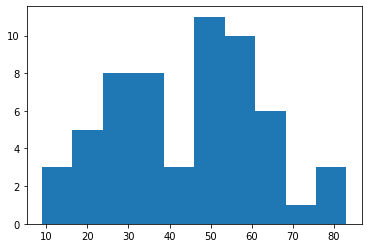

In [18]:
y = y[29:]
X = X[29:]
plt.hist(y)
plt.show()


In [19]:
test1 = SelectKBest(score_func=chi2, k=10000)
fit = test1.fit(X, y)
X = fit.transform(X)

In [20]:
selector = RandomForestRegressor(n_estimators=30, criterion="squared_error", random_state=42)
model = selector.fit(X, y)
importances = model.feature_importances_

important_features = []
for i in range(len(importances)):
    important_features.append(list(importances).index(importances[i])) if importances[i] > 0 else 0
X = X[..., important_features]

In [21]:
#ax.scatter(y[1:], X[1:,0])
#ax.scatter(y[0:1], X[0:1,0])
#for i in range(5):
#    ax.scatter(y, X[:,i])

feature = 34
x = y
y = X[:, feature]

C:\Users\Eugen\AppData\Local\Temp/ipykernel_8964/4260569751.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
C:\Users\Eugen\AppData\Local\Temp/ipykernel_8964/4260569751.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


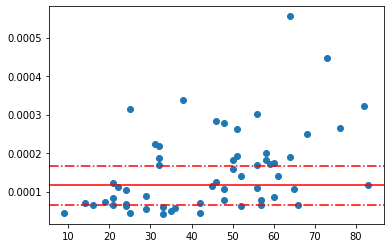

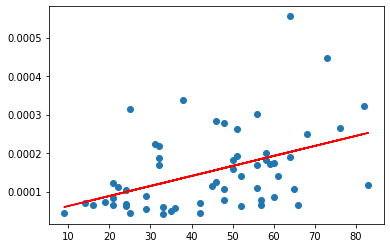

In [22]:
fig1 = plt.figure()
ax = plt.axes()

ax.scatter(x, y)
median = np.median(y)
ax.axhline(median, c="r")
ax.axhline((median - (0.1 * (max(y - min(y))))), c="r", linestyle="-.")
ax.axhline((median + (0.1 * (max(y - min(y))))), c="r", linestyle="-.")
fig1.show()

fig2 = plt.figure()
ax = plt.axes()
ax.plot(x,y, 'o')
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x+b, c="r")

fig2.show()

In [23]:
#names = names[important_features]
#names = names.drop_duplicates()
#print(names)
#names.to_excel("../BIO_Ml/GSE52588/gene_names_CpG_based.xlsx")

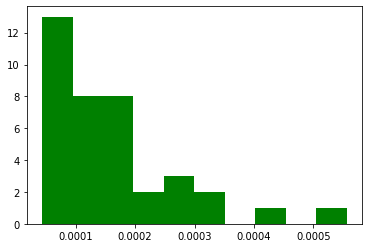

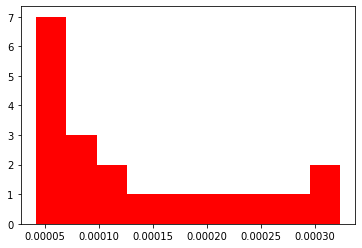

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.hist(y_train, color='g')
plt.show()
plt.hist(y_test, color="r")
plt.show()

In [25]:
regressor = RandomForestRegressor(n_estimators=42, criterion="absolute_error", random_state=42)
#regressor = LinearRegression()
#regressor = SVR(kernel="poly", C = 1.5)
model = regressor.fit(X_train, y_train)

In [26]:
y_pred = regressor.predict(X_test)
res = pd.DataFrame({"Actual": y_test, "Predicted": y_pred,
                    "AE": y_test - y_pred,
                    "SE": (y_test - y_pred) ** 2})
print("MAE: ", mean_absolute_error(y_test, y_pred), "MSE: ", mean_squared_error(y_test, y_pred))
print(res)

MAE:  1.7373961834112246e-05 MSE:  5.067752997336254e-10
      Actual  Predicted            AE            SE
0   0.000083   0.000078  4.847625e-06  2.349947e-11
1   0.000103   0.000097  6.325897e-06  4.001697e-11
2   0.000303   0.000311 -7.911673e-06  6.259456e-11
3   0.000056   0.000077 -2.062105e-05  4.252276e-10
4   0.000284   0.000238  4.668958e-05  2.179916e-09
5   0.000139   0.000150 -1.127515e-05  1.271290e-10
6   0.000188   0.000183  5.129538e-06  2.631216e-11
7   0.000042   0.000065 -2.314375e-05  5.356333e-10
8   0.000114   0.000144 -3.002661e-05  9.015972e-10
9   0.000218   0.000240 -2.207602e-05  4.873508e-10
10  0.000324   0.000377 -5.343584e-05  2.855389e-09
11  0.000066   0.000066 -2.099575e-07  4.408217e-14
12  0.000262   0.000259  3.048770e-06  9.295001e-12
13  0.000071   0.000073 -2.382259e-06  5.675158e-12
14  0.000059   0.000077 -1.758853e-05  3.093562e-10
15  0.000062   0.000080 -1.807950e-05  3.268682e-10
16  0.000043   0.000066 -2.252650e-05  5.074433e-10
17  0.0

C:\Users\Eugen\AppData\Local\Temp/ipykernel_8964/3353738117.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_pred, "bo-", c="r")
C:\Users\Eugen\AppData\Local\Temp/ipykernel_8964/3353738117.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(y_test, "bo-", c="g")


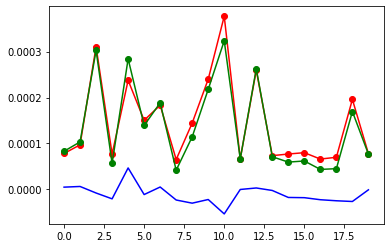

In [27]:
plt.plot(y_pred, "bo-", c="r")
plt.plot(y_test, "bo-", c="g")
plt.plot(y_test - y_pred, c="b")
plt.show()